In [1]:
import glob
import numpy as np
import math
import sys
import os
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
Paper_files_dir_train = glob.glob(r"C:\Users\bira1\OneDrive\Uni MSc\Individual Project\Data\Data for analysis\GermanData\PaperData\paper_train\*.npz")
Batch1_files_dir_train = glob.glob(r"C:\Users\bira1\OneDrive\Uni MSc\Individual Project\Data\Data for analysis\Batch_1_train_hydro_2021\*.npz")
Batch2_files_dir_train =glob.glob(r"C:\Users\bira1\OneDrive\Uni MSc\Individual Project\Data\Data for analysis\Batch_2_train_hydro_2021\*.npz")
High_Ca_files_dir = glob.glob(r"C:\Users\bira1\OneDrive\Uni MSc\Individual Project\Data\Data for analysis\High_Ca_Data\*.npz")



In [3]:
#Choose direc then run script to obtain plot of data distrib

direc = Batch1_files_dir_train

#set save on or off to store locally
save = 'on'

In [4]:
#------------------------------------Obtaining target Channel---------------

In [5]:
def __get_fs_value(idx, channel):
  string_ = direc[idx]
  data = np.load(string_)
  data_val = list(data.values())[0]
  fs = data_val[channel,:1,:1,]
  return fs

In [6]:
def __get_channel(idx, channel):
  string_=direc[idx]
  data = np.load(string_)
  data_val = list(data.values())[0]
  val = data_val[channel,:128,:128,]
  return val

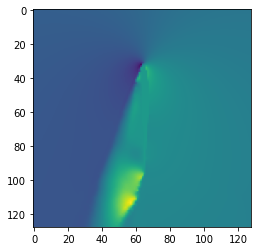

In [19]:
plt.imshow(__get_channel(100,5))

In [63]:
#--------------------FREESTREAM X & Y 0'S-------------------

In [106]:
fsy_dis = []
fsx_dis = []
u_inf_dis = []
for idx in range(0, len(direc)): 
    fsx_result = __get_fs_value(idx,0)[0][0]
    fsy_result = __get_fs_value(idx,1)[0][0]
    fsy_dis.append(fsy_result)
    fsx_dis.append(fsx_result)
    u_inf = math.sqrt((fsx_result**2)+(fsy_result**2))
    u_inf_dis.append(u_inf)

In [107]:
fsy_dis.index(0)

286

In [118]:
__get_fs_value(286,1)

array([[0.]])

In [111]:
def __get_fs(idx, channel):
  string_ = direc[idx]
  data = np.load(string_)
  data_val = list(data.values())[0]
  fs = data_val[channel,:128,:128,]
  return fs

In [122]:
np.unique(__get_fs(205,1))

array([-0.0634428,  0.       ])

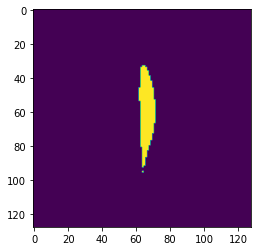

In [116]:
plt.imshow(__get_fs(205,1))

In [121]:
np.unique(__get_fs(286,1))

array([0.        , 0.45379665])

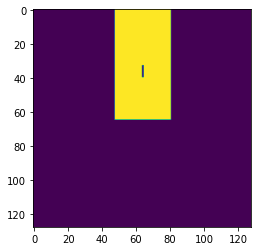

In [120]:
plt.imshow(__get_fs(286,1))

In [16]:
#German data
print('0 in FreeStream y check: {}'.format(0.in fsy_dis))
print('0 in FreeStream x check: {}'.format(0.in fsx_dis))


0 in FreeStream y check: False
0 in FreeStream x check: False


In [37]:
#our data
print('0 in FreeStream y check: {}'.format(0.in fsy_dis))
print('0 in FreeStream x check: {}'.format(0.in fsx_dis))

0 in FreeStream y check: True
0 in FreeStream x check: True


In [316]:
#-------------------------NORM PRESSURE--------------------

In [341]:
max_list_of_target_p_0 = []
mean_list_of_target_p_0 = []


for idx in range(0, len(direc)):
  #choose rho  
  rho = 1000
  
    
  #fsx_result = __get_fs_value(idx,0)[0][0]
  #fsy_result = __get_fs_value(idx,1)[0][0]
  u_inf = 2 #math.sqrt((fsx_result**2)+(fsy_result**2))
  
    
    
  target_p_0 = __get_channel(idx, channel=3)  
  target_p_0_result = np.concatenate( target_p_0, axis=0 )

  mask = __get_channel(idx, channel=2)
  mask_2 = np.concatenate( mask, axis=0 )

  
  target_p_0_result_norm1 = target_p_0_result - np.mean(target_p_0_result) 
  target_p_0_result_norm2 = target_p_0_result_norm1 - (target_p_0_result_norm1*(mask_2)) #pressure*mask
  target_p_0_result_norm3 = target_p_0_result_norm2 / (rho*(u_inf**2))
  target_pressure = np.max(abs(target_p_0_result_norm3)).tolist()
  max_list_of_target_p_0.append(target_pressure)

  mean_target_pressure = np.mean(abs(target_p_0_result_norm3)).tolist()
  mean_list_of_target_p_0.append(mean_target_pressure)

In [342]:
final_norm_list_of_p = []
mean_final_norm_p = []

for p in max_list_of_target_p_0:
  final_norm_list_of_p.append(p/(np.max(max_list_of_target_p_0)))

for p in mean_list_of_target_p_0:
  mean_final_norm_p.append(p/(np.max(mean_list_of_target_p_0)))

In [343]:
#------------------------NORM V_X--------------------------------------

In [344]:
max_list_of_target_v_x_4 = []
mean_list_of_target_v_x_4 = []


for idx in range(0, len(direc)):
  
  
  #fsx_result = __get_fs_value(idx,0)[0][0]
  #fsy_result = __get_fs_value(idx,1)[0][0]

  u_inf = 2 #math.sqrt((fsx_result**2)+(fsy_result**2))
    
 


  target_v_x = __get_channel(idx, channel=4)
  target_v_x_4_result = np.concatenate( target_v_x, axis=0 )

  
  target_v_x_4_result_norm = np.max(abs(target_v_x_4_result)) / u_inf
  target_vel_x = target_v_x_4_result_norm.tolist()
  max_list_of_target_v_x_4.append(target_vel_x) 

  mean_target_v_x_4_result = np.mean(abs(target_v_x_4_result))
  mean_target_v_x_4_result_norm = mean_target_v_x_4_result / u_inf
  mean_target_vel_x = mean_target_v_x_4_result_norm.tolist()
  mean_list_of_target_v_x_4.append(mean_target_vel_x) 
  

In [345]:
final_norm_list_of_v_x = []
mean_final_norm_list_of_v_x = []

for vx in max_list_of_target_v_x_4:
  final_norm_list_of_v_x.append(vx/(np.amax(max_list_of_target_v_x_4)))

for vx in mean_list_of_target_v_x_4:
  mean_final_norm_list_of_v_x.append(vx/(np.amax(mean_list_of_target_v_x_4)))

In [346]:
#--------------------------NORM VY------------------------------------

In [347]:
max_list_of_target_v_y_5 = []
mean_list_of_target_v_y_5 = []

for idx in range(0, len(direc)):
  
  
  #fsx_result = __get_fs_value(idx,0)[0][0]
  #fsy_result = __get_fs_value(idx,1)[0][0]
  u_inf = 2 #math.sqrt((fsx_result**2)+(fsy_result**2))
    

  target_v_y_5 = __get_channel(idx, channel=5)
  target_v_y_5_result = np.concatenate( target_v_y_5, axis=0 )

  target_v_y_5_result_norm = np.max(abs(target_v_y_5_result)) / u_inf
  target_vel_y = target_v_y_5_result_norm.tolist()
  max_list_of_target_v_y_5.append(target_vel_y) 

  mean_target_v_y_5_result = np.mean(abs(target_v_y_5_result))
  mean_target_v_y_5_result_norm = mean_target_v_y_5_result / u_inf
  mean_target_vel_y = mean_target_v_y_5_result_norm.tolist()
  mean_list_of_target_v_y_5.append(mean_target_vel_y) 

In [348]:
final_norm_list_of_v_y = []
mean_final_norm_list_of_v_y = []


for vy in max_list_of_target_v_y_5:
  final_norm_list_of_v_y.append(vy/(np.amax(max_list_of_target_v_y_5)))

for vy in mean_list_of_target_v_y_5:
  mean_final_norm_list_of_v_y.append(vy/(np.amax(mean_list_of_target_v_y_5)))

In [183]:
#------------------Plots--------------------------------------------------

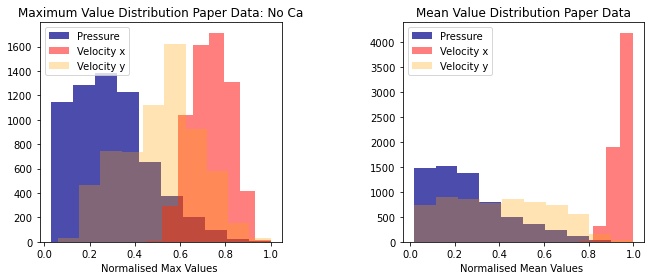

In [100]:
if direc==Paper_files_dir_train:

 plt.subplot(1,2,1)
 plt.xlabel("Normalised Max Values ")
 plt.title("Maximum Value Distribution Paper Data: No Ca")
 plt.hist(final_norm_list_of_p, label= "Pressure", alpha=0.7, color="darkblue")
 plt.hist(final_norm_list_of_v_x, label = "Velocity x", alpha= 0.5, color="red")
 plt.hist(final_norm_list_of_v_y, label= "Velocity y", alpha=0.3, color="orange")
 plt.legend()
 plt.tight_layout()

 plt.subplot(1,2,2)
 plt.xlabel("Normalised Mean Values ")
 plt.title("Mean Value Distribution Paper Data")
 plt.hist(mean_final_norm_p, label= "Pressure", alpha=0.7, color="darkblue")
 plt.hist(mean_final_norm_list_of_v_x, label = "Velocity x", alpha= 0.5, color="red")
 plt.hist(mean_final_norm_list_of_v_y, label= "Velocity y", alpha=0.3, color="orange")
 plt.legend()
 plt.tight_layout()

 plt.subplots_adjust(right=1.5, wspace=0.5)
 if save=='on':
     plt.savefig(r"C:\Users\bira1\OneDrive\Uni MSc\Individual Project\Data\Data for analysis\PaperDataAnalysis.png", dpi=300, bbox_inches='tight')
 plt.show()

In [ ]:
#---Batch1 IS OUR DATA-----

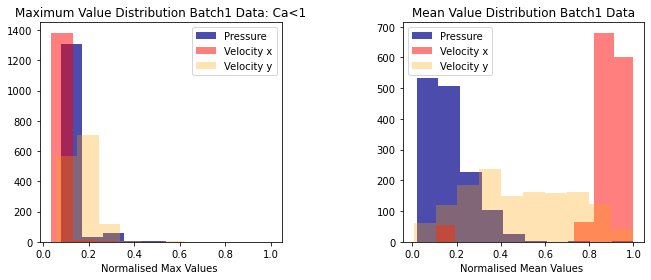

In [84]:
if direc==Batch1_files_dir_train:

 plt.subplot(1,2,1)
 plt.xlabel("Normalised Max Values ")
 plt.title("Maximum Value Distribution Batch1 Data: Ca<1")
 plt.hist(final_norm_list_of_p, label= "Pressure", alpha=0.7, color="darkblue")
 plt.hist(final_norm_list_of_v_x, label = "Velocity x", alpha= 0.5, color="red")
 plt.hist(final_norm_list_of_v_y, label= "Velocity y", alpha=0.3, color="orange")
 plt.legend()
 plt.tight_layout()

 plt.subplot(1,2,2)
 plt.xlabel("Normalised Mean Values ")
 plt.title("Mean Value Distribution Batch1 Data")
 plt.hist(mean_final_norm_p, label= "Pressure", alpha=0.7, color="darkblue")
 plt.hist(mean_final_norm_list_of_v_x, label = "Velocity x", alpha= 0.5, color="red")
 plt.hist(mean_final_norm_list_of_v_y, label= "Velocity y", alpha=0.3, color="orange")
 plt.legend()
 plt.tight_layout()

 plt.subplots_adjust(right=1.5, wspace=0.5)
 if save=='on':
     plt.savefig(r"C:\Users\bira1\OneDrive\Uni MSc\Individual Project\Data\Data for analysis\Batch1DataAnalysis.png", dpi=300, bbox_inches='tight')
 plt.show()

In [ ]:
#-------Outlier Analysis-----------------------------------------------------------------

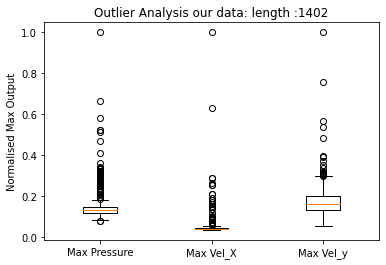

In [278]:
y1 = final_norm_list_of_p
y2 = final_norm_list_of_v_x
y3 = final_norm_list_of_v_y

p1 = plt.boxplot([y1,y2,y3],positions=[1,2,3])

plt.ylabel('Normalised Max Output')
plt.xticks([1, 2, 3], ['Max Pressure', 'Max Vel_X', 'Max Vel_y'])
plt.title('Outlier Analysis our data: length :{}'.format(len(final_norm_list_of_p)))
plt.show()

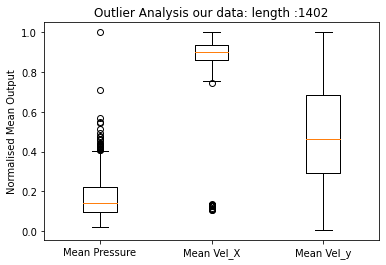

In [279]:
y1 = mean_final_norm_p
y2 = mean_final_norm_list_of_v_x
y3 = mean_final_norm_list_of_v_y

p1 = plt.boxplot([y1,y2,y3],positions=[1,2,3])

plt.ylabel('Normalised Mean Output')
plt.xticks([1, 2, 3], ['Mean Pressure', 'Mean Vel_X', 'Mean Vel_y'])
plt.title('Outlier Analysis our data: length :{}'.format(len(final_norm_list_of_p)))
plt.show()

In [349]:
no_outlier_idx = []
for p in final_norm_list_of_p:
    if p < 0.15:
        no_outlier_idx.append(final_norm_list_of_p.index(p))
        
        
    

In [371]:
p_015 = []
for idx in no_outlier_idx:
    p_015.append(direc[idx])

In [375]:
save_path = "C:\Users\bira1\p_015_train_hydro"

for file in p_015:
    os.path.join(save_path, file)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-375-07c146c86a08>, line 1)

In [360]:
print("length of p<0.15: {}".format(len(no_outlier_idx)))

length of p<0.15: 1127


In [259]:
#--------------------pressure------------------

In [350]:
max_list_of_target_p_0 = []
mean_list_of_target_p_0 = []


for idx in no_outlier_idx:
  #choose rho  
  rho = 1000
  
    
  #fsx_result = __get_fs_value(idx,0)[0][0]
  #fsy_result = __get_fs_value(idx,1)[0][0]
  u_inf = 2 #math.sqrt((fsx_result**2)+(fsy_result**2))
  
    
    
  target_p_0 = __get_channel(idx, channel=3)  
  target_p_0_result = np.concatenate( target_p_0, axis=0 )

  mask = __get_channel(idx, channel=2)
  mask_2 = np.concatenate( mask, axis=0 )

  
  target_p_0_result_norm1 = target_p_0_result - np.mean(target_p_0_result) 
  target_p_0_result_norm2 = target_p_0_result_norm1 - (target_p_0_result_norm1*(mask_2)) #pressure*mask
  target_p_0_result_norm3 = target_p_0_result_norm2 / (rho*(u_inf**2))
  target_pressure = np.max(abs(target_p_0_result_norm3)).tolist()
  max_list_of_target_p_0.append(target_pressure)

  mean_target_pressure = np.mean(abs(target_p_0_result_norm3)).tolist()
  mean_list_of_target_p_0.append(mean_target_pressure)

In [351]:
final_norm_list_of_p = []
mean_final_norm_p = []

for p in max_list_of_target_p_0:
  final_norm_list_of_p.append(p/(np.max(max_list_of_target_p_0)))

for p in mean_list_of_target_p_0:
  mean_final_norm_p.append(p/(np.max(mean_list_of_target_p_0)))

In [352]:
#-------------------------vx-------------------------

In [353]:
max_list_of_target_v_x_4 = []
mean_list_of_target_v_x_4 = []


for idx in no_outlier_idx:
  
  
  #fsx_result = __get_fs_value(idx,0)[0][0]
  #fsy_result = __get_fs_value(idx,1)[0][0]

  u_inf = 2 #math.sqrt((fsx_result**2)+(fsy_result**2))
    
 


  target_v_x = __get_channel(idx, channel=4)
  target_v_x_4_result = np.concatenate( target_v_x, axis=0 )

  
  target_v_x_4_result_norm = np.max(abs(target_v_x_4_result)) / u_inf
  target_vel_x = target_v_x_4_result_norm.tolist()
  max_list_of_target_v_x_4.append(target_vel_x) 

  mean_target_v_x_4_result = np.mean(abs(target_v_x_4_result))
  mean_target_v_x_4_result_norm = mean_target_v_x_4_result / u_inf
  mean_target_vel_x = mean_target_v_x_4_result_norm.tolist()
  mean_list_of_target_v_x_4.append(mean_target_vel_x) 

In [354]:
final_norm_list_of_v_x = []
mean_final_norm_list_of_v_x = []

for vx in max_list_of_target_v_x_4:
  final_norm_list_of_v_x.append(vx/(np.amax(max_list_of_target_v_x_4)))

for vx in mean_list_of_target_v_x_4:
  mean_final_norm_list_of_v_x.append(vx/(np.amax(mean_list_of_target_v_x_4)))

In [355]:
#-----------------------vy-------------------------------

In [356]:
max_list_of_target_v_y_5 = []
mean_list_of_target_v_y_5 = []

for idx in no_outlier_idx:
  
  
  #fsx_result = __get_fs_value(idx,0)[0][0]
  #fsy_result = __get_fs_value(idx,1)[0][0]
  u_inf = 2 #math.sqrt((fsx_result**2)+(fsy_result**2))
    

  target_v_y_5 = __get_channel(idx, channel=5)
  target_v_y_5_result = np.concatenate( target_v_y_5, axis=0 )

  target_v_y_5_result_norm = np.max(abs(target_v_y_5_result)) / u_inf
  target_vel_y = target_v_y_5_result_norm.tolist()
  max_list_of_target_v_y_5.append(target_vel_y) 

  mean_target_v_y_5_result = np.mean(abs(target_v_y_5_result))
  mean_target_v_y_5_result_norm = mean_target_v_y_5_result / u_inf
  mean_target_vel_y = mean_target_v_y_5_result_norm.tolist()
  mean_list_of_target_v_y_5.append(mean_target_vel_y) 

In [357]:
final_norm_list_of_v_y = []
mean_final_norm_list_of_v_y = []


for vy in max_list_of_target_v_y_5:
  final_norm_list_of_v_y.append(vy/(np.amax(max_list_of_target_v_y_5)))

for vy in mean_list_of_target_v_y_5:
  mean_final_norm_list_of_v_y.append(vy/(np.amax(mean_list_of_target_v_y_5)))

In [336]:
#--------------------------------

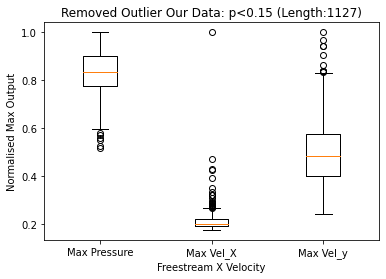

In [358]:
y1 = final_norm_list_of_p
y2 = final_norm_list_of_v_x
y3 = final_norm_list_of_v_y

p1 = plt.boxplot([y1,y2,y3],positions=[1,2,3])

plt.ylabel('Normalised Max Output')
plt.xlabel('Freestream X Velocity')
plt.xticks([1, 2, 3], ['Max Pressure', 'Max Vel_X', 'Max Vel_y'])
plt.title('Removed Outlier Our Data: p<0.15 (Length:{})'.format(len(final_norm_list_of_p)))
plt.show()

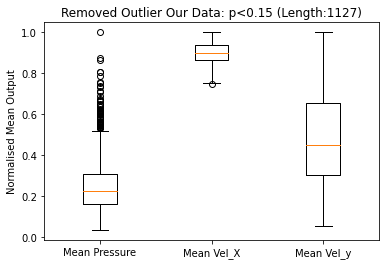

In [359]:
y1 = mean_final_norm_p
y2 = mean_final_norm_list_of_v_x
y3 = mean_final_norm_list_of_v_y

p1 = plt.boxplot([y1,y2,y3],positions=[1,2,3])

plt.ylabel('Normalised Mean Output')
plt.xticks([1, 2, 3], ['Mean Pressure', 'Mean Vel_X', 'Mean Vel_y'])
plt.title('Removed Outlier Our Data: p<0.15 (Length:{})'.format(len(final_norm_list_of_p)))
plt.show()

In [ ]:
#------------------------

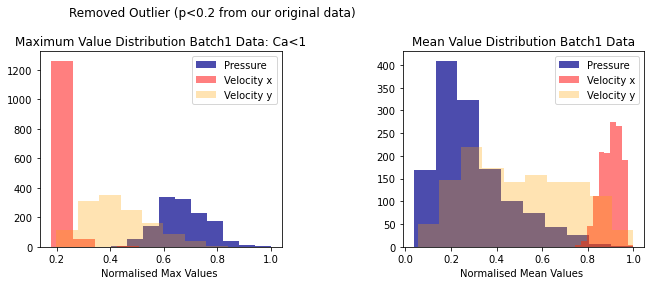

In [45]:
if direc==Batch1_files_dir_train:

 plt.subplot(1,2,1)
 plt.xlabel("Normalised Max Values ")
 plt.title("Maximum Value Distribution Batch1 Data: Ca<1")
 plt.hist(final_norm_list_of_p, label= "Pressure", alpha=0.7, color="darkblue")
 plt.hist(final_norm_list_of_v_x, label = "Velocity x", alpha= 0.5, color="red")
 plt.hist(final_norm_list_of_v_y, label= "Velocity y", alpha=0.3, color="orange")
 plt.legend()
 plt.tight_layout()

 plt.subplot(1,2,2)
 plt.xlabel("Normalised Mean Values ")
 plt.title("Mean Value Distribution Batch1 Data")
 plt.hist(mean_final_norm_p, label= "Pressure", alpha=0.7, color="darkblue")
 plt.hist(mean_final_norm_list_of_v_x, label = "Velocity x", alpha= 0.5, color="red")
 plt.hist(mean_final_norm_list_of_v_y, label= "Velocity y", alpha=0.3, color="orange")
 plt.legend()
 plt.tight_layout()
 
 plt.suptitle("Removed Outlier (p<0.2 from our original data)")
 plt.tight_layout()
 plt.subplots_adjust(right=1.5, wspace=0.5)
 if save=='on':
     plt.savefig(r"C:\Users\bira1\OneDrive\Uni MSc\Individual Project\Data\Data for analysis\Batch1DataAnalysis.png", dpi=300, bbox_inches='tight')
 plt.show()

In [ ]:
#---------------------------

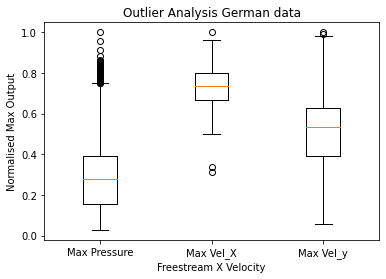

In [101]:
y1 = final_norm_list_of_p
y2 = final_norm_list_of_v_x
y3 = final_norm_list_of_v_y

p1 = plt.boxplot([y1,y2,y3],positions=[1,2,3])

plt.ylabel('Normalised Max Output')
plt.xlabel('Freestream X Velocity')
plt.xticks([1, 2, 3], ['Max Pressure', 'Max Vel_X', 'Max Vel_y'])
plt.title('Outlier Analysis German data')
plt.show()

In [ ]:
#--------------Identifying the outlier files--------------------------------------------------

In [ ]:
listOL= np.array(final_norm_list_of_p)
index_of_OL = np.where(np.logical_and(listOL>= 0.1, listOL<= 1.0))
List12 = index_of_OL[0]

In [ ]:
files_names_of_OL = []
for x in List12:
  string = direc[x]
  files_names_of_OL.append(string)

list_of_outlier_files = [s.replace("C:\\Users\\bira1\\OneDrive\\Uni MSc\\Individual Project\\Data\\Data for analysis\\Batch_1_train_hydro_2021\\", "") for s in files_names_of_OL]
outlier_files = [s.replace(".npz", "") for s in list_of_outlier_files]

In [ ]:
OL_U_x = []
OL_U_y = []
OL_alpha = []
OL_cavit = []
for x in outlier_files:
    split_name = x.split('_')
    OL_U_x.append(int(split_name[1])/100)
    OL_U_y.append(int(split_name[2])/100)
    OL_cavit.append(int(split_name[4])/100)
    OL_alpha.append(int(split_name[5])/10)

In [ ]:
Outlier_P = []
for x in final_norm_list_of_p:
    if x>=0.1 and x<=1.0:
        Outlier_P.append(x)

In [ ]:
plt.subplot(1,2,1)
plt.hist(OL_alpha)
plt.title('Outliers: Angle_of_attack')
plt.xlabel("AoA")
plt.tight_layout()

plt.subplot(1,2,2)
plt.hist(OL_cavit)
plt.xlabel("Cavit Number")
plt.title('Outliers: Cavitation Number')
plt.tight_layout()


plt.suptitle("Outliers", x=1.5, fontsize='xx-large')
plt.subplots_adjust(top=0.8, right=3.0, wspace=0.5)
plt.show()

In [ ]:
color= np.array(Outlier_P)
plt.scatter(x= OL_alpha,y=OL_cavit, c=color)
plt.colorbar(label="Pressure Values")

plt.title('Outliers')
plt.xlabel("AoA")
plt.ylabel("Cavitnumber")

plt.savefig(r"C:\Users\bira1\OneDrive\Uni MSc\Individual Project\Data\Data for analysis\OutlierAnalysis.png", dpi=300, bbox_inches='tight')
plt.show()